# Análise de imagem

** Atividade 1 - item 2 - Pós-graduação em Mineração de Dados - IFES - SERRA - ES**

**Professor: Dr. Richard Junior Manuel Godinez Tello** \
**Aluno: Sandro Ricardo De Souza**

Descrição do exercício:

> A imagem do arquivo "imagem_carro.png" corresponde à parte traseira de um carro. Como pode ser observado, a imagem está escura. Elabore um algoritmo em Python para responder aos seguintes questionamentos:
> - a) Aparentemente a imagem está em tons de cinza, mas a escala do arquivo é realmente em tons de cinza? Dica: verifique o número de canais do arquivo. Se tiver 3 canais será RGB, se possuir apenas um, estará na escala de cinzas real (grayscale). 
>- b) Realize ajustes na imagem, como modificação de contraste, equalização do histograma, binarização adaptativa, binarização pelo método de OTSU, aplicação de operações morfológicas ou outro método de sua preferência, com o objetivo de identificar a placa do carro. Dica: Avalie cada método separadamente ou combine-os, caso necessário, para atingir o objetivo desejado. 

> Valor: 5 pontos

## Importar módulos

In [1]:
# Carregando a imagem
from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import exposure
import sys

## Leitura da imagem

In [2]:
path_file = r'../figuras/imagem_carro.png'
img = image.imread(path_file)

## Obtenção de informações iniciais da imagem

Tipo de dado: float32
Dimensões da imagem (altura, largura, canais): (241, 256)


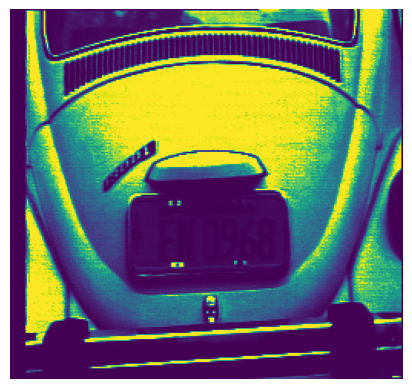

In [3]:
# Informações da imagem
print("Tipo de dado:", img.dtype) # Exemplo: uint8
print("Dimensões da imagem (altura, largura, canais):", img.shape)  # Exemplo: (1080, 1920, 3)

# Mostrar a imagem
plt.imshow(img)
plt.axis('off')
plt.show()

# Acessando um pixel específico
y, x = 100, 200  # Coordenadas
pixel = img[y, x]  # Lembrando que a indexação começa em (0,0)

## Item a) Verificar se a imagem está em "tons de cinza"

Verificar o número de canais do arquivo. Se tiver 3 canais será RGB, se possuir apenas um, estará na escala de cinzas real (grayscale)

In [4]:
# Confirma se a imagem é RGB ou tons de cinza
if len(img.shape) == 3 and img.shape[2] == 3:
  print("A imagem RGB.")
elif len(img.shape) == 2 or (len(img.shape) == 3 and img.shape[2] == 1):
  print("A imagem em tons de cinza.")
else:
  print("Não foi possível determinar se a imagem é RGB ou tons de cinza.")

A imagem em tons de cinza.


## Item b) Identificar a placa do carro 

Realizar ajustes na imagem, como modificação de contraste, equalização do histograma, binarização adaptativa, binarização pelo método de OTSU, aplicação de operações morfológicas, com o objetivo de identificar a placa do carro.

A imagem já está em tons de cinza. Vamos efetuar alguns testes.



### Inverter as "cores" a imagem

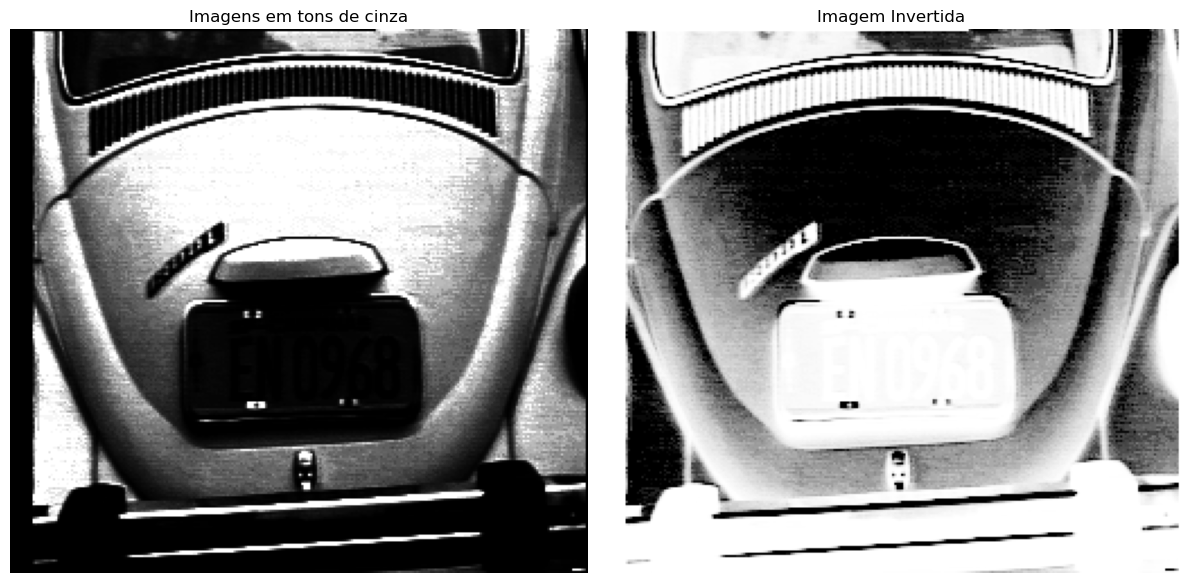

In [5]:
# A imagem já está em tons de cinza. Vamos fazer uma cópia.
img_gray = img

# Converter a imagem em tons de cinza para um array Numpy.
img_gray_array = np.array(img_gray)

# Inverter os valores dos pixels
img_inverted = 255 - img_gray_array

# Converter os arrays para imagens PIL
img_inverted_pil = Image.fromarray(img_inverted)
img_gray_pil = Image.fromarray(img_gray_array)

# Exibir a imagem original e a imagem transformada  e invertida.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Mostrar a imagem original
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Imagens em tons de cinza')
axes[0].axis('off')

# Mostrar a imagem invertida
axes[1].imshow(img_inverted, cmap='gray')
axes[1].set_title('Imagem Invertida')
axes[1].axis('off')

plt.tight_layout()
plt.show()

Numa análise preliminar, apenas invertendo os píxels dos tons de cinza, é possível ver os caracteres da placa. Mas vamos continuar a análise 

### Ajustar o contraste

In [6]:
# def ajuste_contraste(img_array, fator=2.0):
#     """
#         Ajusta o contraste da imagem multiplicando os valores dos pixels pelo fator.
#     """
#     img_array = np.clip(fator * (img_array - 128) + 128, 0, 255)
#     return img_array.astype(np.uint8)


def ajuste_contraste(img_array, fator=2.0):
    """
    Ajusta o contraste de uma imagem em tons de cinza.
    """
    # Garantir que a imagem está em uint8 (0-255)
    if img_array.dtype != np.uint8:
        img_array = (img_array * 255).astype(np.uint8)

    # Aplicar ajuste de contraste em imagem de um canal
    img_array = np.clip(fator * (img_array - 128) + 128, 0, 255)

    return img_array.astype(np.uint8)

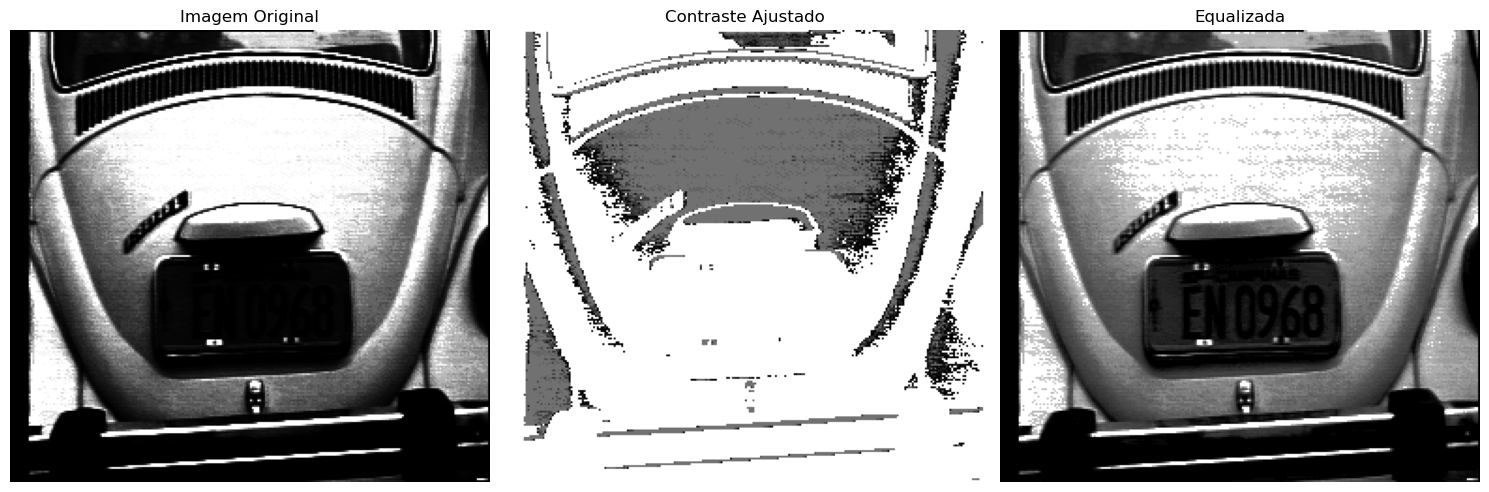

In [7]:
# Converter a imagem para um array numpy
img_array = np.array(img)

# Ajuste do contraste
img_contraste = ajuste_contraste(img_array, 1.0)

# Equalização do histograma
img_equalizada = exposure.equalize_hist(img_array / 255.0) # Normaliza de 0 a 1
img_equalizada = (img_equalizada * 255).astype(np.uint8) # Volta para 0 a 255

# Criar figuras lado a lado
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 linha, 3 colunas, tamanho ajustado

# Plotar cada imagem no subplot correspondente
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Imagem Original')
axes[0].axis('off')  # Esconde os eixos

axes[1].imshow(img_contraste, cmap='gray')
axes[1].set_title('Contraste Ajustado')
axes[1].axis('off')

axes[2].imshow(img_equalizada, cmap='gray')
axes[2].set_title('Equalizada')
axes[2].axis('off')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

Portanto, com o ajuste de contraste, não foi possível ver a placa. Mas com a equalização, foi possível, sendo a placa **EN 0968**.

## Conclusão

### Item a) Verificação da Escala de Cores
Ao carregar a imagem e analisar suas dimensões, identificamos que ela possui apenas um canal, confirmando que a escala do arquivo está, de fato, em tons de cinza (grayscale). Isso significa que os valores dos pixels representam diferentes intensidades de brilho, variando entre 0 (preto) e 255 (branco), sem a presença de informações de cores RGB.  

Essa verificação foi fundamental para definir os próximos passos do processamento da imagem, garantindo que os métodos aplicados fossem adequados ao seu formato.  

---

### Item b) Processamento para Identificação da Placa

O objetivo do exercício era aplicar técnicas de processamento de imagem para melhorar a visibilidade da placa do carro. Diversas abordagens foram testadas para avaliar sua eficácia:  

1. **Inversão de cores (Negativo da Imagem)**  
   - A inversão dos tons de cinza revelou imediatamente a placa do veículo, tornando os caracteres mais visíveis em relação ao fundo.  
   - Esse resultado indica que a placa se destaca mais quando as cores são invertidas, pois há um contraste natural entre os caracteres e o fundo escuro da imagem original.  

2. **Ajuste de Contraste**  
   - Ao aplicar um fator de contraste à imagem, o resultado não apresentou uma melhoria significativa na visibilidade da placa.  
   - Isso ocorre porque a imagem já possui um intervalo de intensidade bem distribuído, e o ajuste de contraste não foi suficiente para destacar a região da placa de forma isolada.  

3. **Equalização do Histograma**  
   - A equalização do histograma melhorou significativamente a visibilidade da placa.  
   - Essa técnica redistribui os níveis de intensidade da imagem, aumentando o contraste global e destacando detalhes importantes.  
   - Como resultado, foi possível identificar claramente os caracteres da placa, que são **"EN 0968"**.  

---

### Conclusão Final
A partir das análises realizadas, concluímos que a **equalização do histograma foi o método mais eficaz** para identificar a placa do veículo, pois realçou os contrastes e evidenciou os caracteres sem a necessidade de segmentação adicional.  

A inversão da imagem também se mostrou uma abordagem interessante, revelando a placa com um simples ajuste nos valores dos pixels. Já o ajuste de contraste, por si só, não trouxe uma melhora significativa para o problema proposto.  

Caso fosse necessário um processamento ainda mais refinado, técnicas adicionais poderiam ser exploradas, como **binarização pelo método de Otsu e operações morfológicas**, para melhorar a segmentação dos caracteres da placa.  

Assim, com base nas técnicas utilizadas, a placa do carro foi identificada com sucesso!